---
**Copyright 2026 Adilkhan Salkimbayev**  
Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at [apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0).
---

In [ ]:
from kan import KAN; 
import torch; 
device = torch.device('cpu')
print(f"KAN will train on: {device}")

KAN will train on: cpu


In [ ]:
model = KAN(width=[8, 5, 2], grid=20, k=3, seed=42, device=device)

checkpoint directory created: ./model
saving model version 0.0


In [ ]:
import pandas as pd
import numpy as np
import torch

# Load Data
df = pd.read_csv('quad_tank_golden_reference_P_plus.csv')

target_vector = [10.0, 10.0, 2.0, 2.0]
state = df[['h1_est', 'h2_est', 'h3_est', 'h4_est']].values
error = target_vector - state 
inputs = np.hstack((state, error)) 


inputs_norm = inputs / 20.0  

inputs_jittered = inputs_norm + np.random.randn(*inputs_norm.shape) * 1e-4

outputs = df[['u1_volts', 'u2_volts']].values

outputs_norm = outputs / 12.0

train_ratio = 0.8
n_samples = inputs.shape[0]
n_train = int(n_samples * train_ratio)

# Create Dataset with Normalized Data
dataset = {
    'train_input': torch.from_numpy(inputs_jittered[:n_train]).float().to(device),
    'train_label': torch.from_numpy(outputs_norm[:n_train]).float().to(device),
    'test_input': torch.from_numpy(inputs_jittered[n_train:]).float().to(device), # Jitter test too
    'test_label': torch.from_numpy(outputs_norm[n_train:]).float().to(device)
}

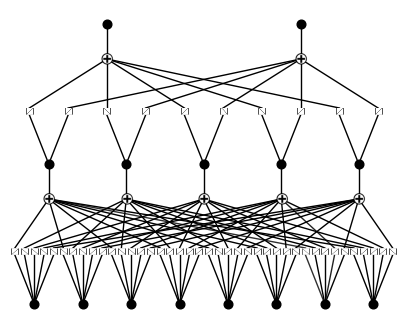

In [ ]:
model(dataset['train_input']);
model.plot(beta=100)

In [ ]:
model.fit(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.)

| train_loss: 2.03e-01 | test_loss: 2.35e-01 | reg: 1.14e+00 | : 100%|█| 20/20 [00:04<00:00,  4.30it

saving model version 0.1


{'train_loss': [array(0.22178905, dtype=float32),
  array(0.21862799, dtype=float32),
  array(0.21589886, dtype=float32),
  array(0.21262394, dtype=float32),
  array(0.21067911, dtype=float32),
  array(0.21002002, dtype=float32),
  array(0.20900455, dtype=float32),
  array(0.20818286, dtype=float32),
  array(0.20736425, dtype=float32),
  array(0.20655379, dtype=float32),
  array(0.20600922, dtype=float32),
  array(0.20549545, dtype=float32),
  array(0.20492357, dtype=float32),
  array(0.20437415, dtype=float32),
  array(0.20401184, dtype=float32),
  array(0.20379414, dtype=float32),
  array(0.20351875, dtype=float32),
  array(0.20322569, dtype=float32),
  array(0.20301232, dtype=float32),
  array(0.20278288, dtype=float32)],
 'test_loss': [array(0.24496303, dtype=float32),
  array(0.24341889, dtype=float32),
  array(0.2410037, dtype=float32),
  array(0.23865706, dtype=float32),
  array(0.23731282, dtype=float32),
  array(0.23854004, dtype=float32),
  array(0.2379572, dtype=float32),
  

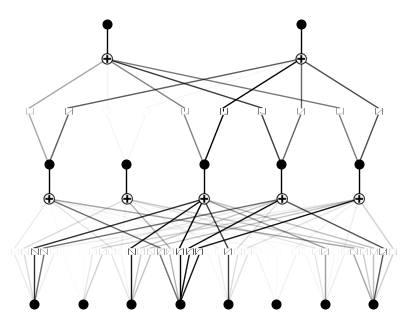

In [ ]:
model.plot()

saving model version 0.2


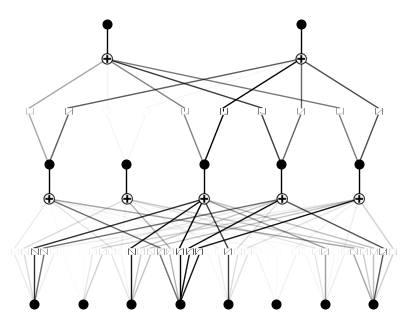

In [ ]:
model.prune()
model.plot()

saving model version 0.3


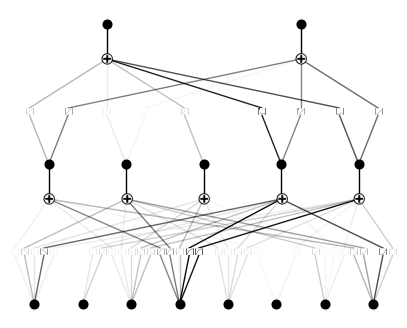

In [ ]:
model = model.prune(edge_th=1e-2)
model.plot()

In [ ]:
model.fit(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.)

| train_loss: 2.04e-01 | test_loss: 2.31e-01 | reg: 5.43e-01 | : 100%|█| 20/20 [00:04<00:00,  4.48it

saving model version 0.4


{'train_loss': [array(0.20673296, dtype=float32),
  array(0.20667678, dtype=float32),
  array(0.20664369, dtype=float32),
  array(0.20654613, dtype=float32),
  array(0.20632137, dtype=float32),
  array(0.20613006, dtype=float32),
  array(0.20592327, dtype=float32),
  array(0.2058495, dtype=float32),
  array(0.20562871, dtype=float32),
  array(0.20531622, dtype=float32),
  array(0.2051147, dtype=float32),
  array(0.20501156, dtype=float32),
  array(0.20492381, dtype=float32),
  array(0.20482244, dtype=float32),
  array(0.20466292, dtype=float32),
  array(0.20454773, dtype=float32),
  array(0.20437464, dtype=float32),
  array(0.20417501, dtype=float32),
  array(0.20397513, dtype=float32),
  array(0.20375851, dtype=float32)],
 'test_loss': [array(0.23231818, dtype=float32),
  array(0.232283, dtype=float32),
  array(0.23225538, dtype=float32),
  array(0.2321972, dtype=float32),
  array(0.23207581, dtype=float32),
  array(0.23219617, dtype=float32),
  array(0.23208831, dtype=float32),
  arr

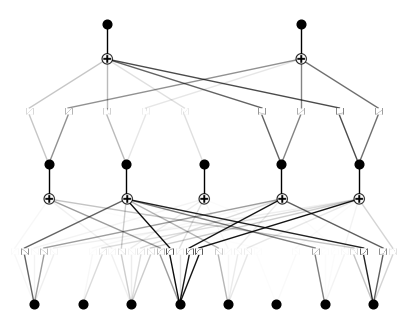

In [ ]:
model.plot()

saving model version 0.5


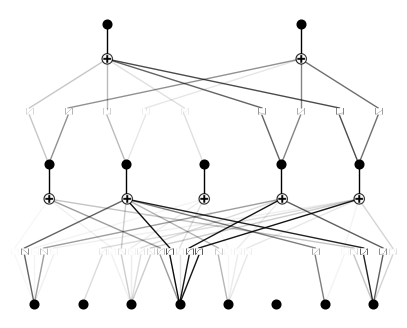

In [ ]:
model = model.prune(edge_th=1e-2)
model.plot()

In [ ]:
model.auto_symbolic(lib=['x', 'x^2', 'sqrt']) # Force it to look for physics terms
formula = model.symbolic_formula()[0][0] # Look at output 0 (Pump 1)
print(f"Pump 1 Formula: {formula}")

fixing (0,0,0) with x, r2=0.00048074970254674554, c=1
fixing (0,0,1) with x^2, r2=0.9432756304740906, c=2
fixing (0,0,2) with x, r2=0.006166535895317793, c=1
fixing (0,0,3) with x, r2=0.016238240525126457, c=1
fixing (0,0,4) with x, r2=0.0003678193024825305, c=1
fixing (0,1,0) with 0
fixing (0,1,1) with 0
fixing (0,1,2) with 0
fixing (0,1,3) with 0
fixing (0,1,4) with x, r2=7.685137097723782e-05, c=1
fixing (0,2,0) with x, r2=0.0015706297708675265, c=1
fixing (0,2,1) with x, r2=0.0016239136457443237, c=1
fixing (0,2,2) with x, r2=0.01450267992913723, c=1
fixing (0,2,3) with x, r2=0.0019064981024712324, c=1
fixing (0,2,4) with x, r2=0.004110795445740223, c=1
fixing (0,3,0) with x, r2=0.7121834754943848, c=1
fixing (0,3,1) with x, r2=0.782301664352417, c=1
fixing (0,3,2) with x, r2=0.6148543357849121, c=1
fixing (0,3,3) with x, r2=0.8223541378974915, c=1
fixing (0,3,4) with x, r2=0.8321345448493958, c=1
fixing (0,4,0) with 0
fixing (0,4,1) with x, r2=0.003610886400565505, c=1
fixing (0,4

In [ ]:
model.fit(dataset, opt="LBFGS", steps=20, lamb=0.002, lamb_entropy=2.)

| train_loss: 4.98e-02 | test_loss: 5.04e-02 | reg: 0.00e+00 | : 100%|█| 20/20 [00:10<00:00,  1.93it

saving model version 0.7


{'train_loss': [array(0.09619091, dtype=float32),
  array(0.09033205, dtype=float32),
  array(0.07157848, dtype=float32),
  array(0.06790722, dtype=float32),
  array(0.06427305, dtype=float32),
  array(0.05921907, dtype=float32),
  array(0.05770385, dtype=float32),
  array(0.05142104, dtype=float32),
  array(0.05057817, dtype=float32),
  array(0.05040899, dtype=float32),
  array(0.05018884, dtype=float32),
  array(0.04998103, dtype=float32),
  array(0.04996596, dtype=float32),
  array(0.04996293, dtype=float32),
  array(0.04996251, dtype=float32),
  array(0.04995962, dtype=float32),
  array(0.04995761, dtype=float32),
  array(0.04995163, dtype=float32),
  array(0.04987438, dtype=float32),
  array(0.04981727, dtype=float32)],
 'test_loss': [array(0.08696535, dtype=float32),
  array(0.11083747, dtype=float32),
  array(0.07963961, dtype=float32),
  array(0.04439168, dtype=float32),
  array(0.04153268, dtype=float32),
  array(0.0542977, dtype=float32),
  array(0.05487661, dtype=float32),
 

saving model version 0.8


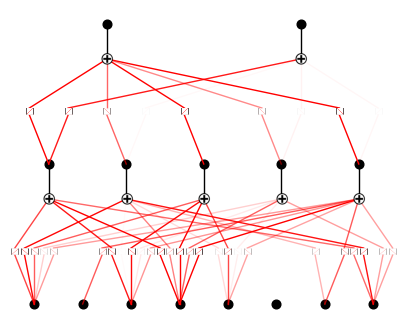

In [ ]:
model.prune(edge_th=1e-2)
model.plot()

In [ ]:
model.fit(dataset, opt="LBFGS", steps=20, lamb=0.0015, lamb_entropy=2.)

| train_loss: 4.87e-02 | test_loss: 5.79e-02 | reg: 0.00e+00 | : 100%|█| 20/20 [00:07<00:00,  2.85it

saving model version 0.8


{'train_loss': [array(0.04976941, dtype=float32),
  array(0.04973373, dtype=float32),
  array(0.049667, dtype=float32),
  array(0.04964236, dtype=float32),
  array(0.04959684, dtype=float32),
  array(0.04928869, dtype=float32),
  array(0.04905812, dtype=float32),
  array(0.04887205, dtype=float32),
  array(0.04871, dtype=float32),
  array(0.04867065, dtype=float32),
  array(0.04867054, dtype=float32),
  array(0.04867054, dtype=float32),
  array(0.04867054, dtype=float32),
  array(0.04866396, dtype=float32),
  array(0.0486619, dtype=float32),
  array(0.0486619, dtype=float32),
  array(0.04866183, dtype=float32),
  array(0.04866182, dtype=float32),
  array(0.04866183, dtype=float32),
  array(0.04866183, dtype=float32)],
 'test_loss': [array(0.05252245, dtype=float32),
  array(0.05281933, dtype=float32),
  array(0.0530563, dtype=float32),
  array(0.05089947, dtype=float32),
  array(0.04944095, dtype=float32),
  array(0.04829432, dtype=float32),
  array(0.05499785, dtype=float32),
  array(

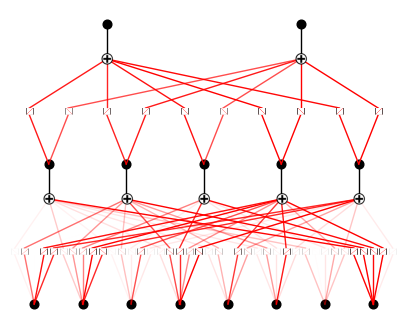

In [ ]:
model(dataset['train_input'])
model.plot()

In [ ]:
model.fit(dataset, opt="LBFGS", steps=20, lamb=0.0015, lamb_entropy=2.)

| train_loss: 4.87e-02 | test_loss: 5.79e-02 | reg: 0.00e+00 | : 100%|█| 20/20 [00:02<00:00,  8.12it

saving model version 0.10


{'train_loss': [array(0.04866182, dtype=float32),
  array(0.04866183, dtype=float32),
  array(0.04866183, dtype=float32),
  array(0.04866183, dtype=float32),
  array(0.04866182, dtype=float32),
  array(0.04866183, dtype=float32),
  array(0.04866183, dtype=float32),
  array(0.04866182, dtype=float32),
  array(0.04866183, dtype=float32),
  array(0.04866182, dtype=float32),
  array(0.04866182, dtype=float32),
  array(0.04866183, dtype=float32),
  array(0.04866183, dtype=float32),
  array(0.04866182, dtype=float32),
  array(0.04866182, dtype=float32),
  array(0.04866182, dtype=float32),
  array(0.04866183, dtype=float32),
  array(0.04866182, dtype=float32),
  array(0.04866183, dtype=float32),
  array(0.04866183, dtype=float32)],
 'test_loss': [array(0.05793254, dtype=float32),
  array(0.05793254, dtype=float32),
  array(0.05793254, dtype=float32),
  array(0.05793254, dtype=float32),
  array(0.05793254, dtype=float32),
  array(0.05793254, dtype=float32),
  array(0.05793254, dtype=float32),


saving model version 0.11


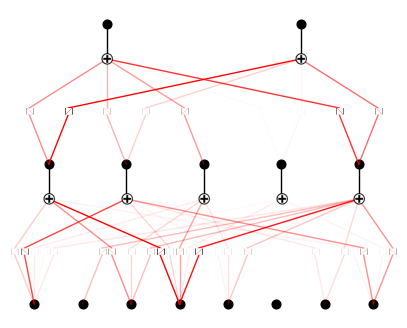

In [ ]:
model.prune(edge_th=1e-2)
model.plot()

In [ ]:
model.fit(dataset, opt="LBFGS", steps=20, lamb=0.0015, lamb_entropy=2.)

| train_loss: 4.87e-02 | test_loss: 5.79e-02 | reg: 0.00e+00 | : 100%|█| 20/20 [00:02<00:00,  7.99it

saving model version 0.11


{'train_loss': [array(0.04866182, dtype=float32),
  array(0.04866183, dtype=float32),
  array(0.04866183, dtype=float32),
  array(0.04866183, dtype=float32),
  array(0.04866182, dtype=float32),
  array(0.04866183, dtype=float32),
  array(0.04866183, dtype=float32),
  array(0.04866182, dtype=float32),
  array(0.04866183, dtype=float32),
  array(0.04866182, dtype=float32),
  array(0.04866182, dtype=float32),
  array(0.04866183, dtype=float32),
  array(0.04866183, dtype=float32),
  array(0.04866182, dtype=float32),
  array(0.04866182, dtype=float32),
  array(0.04866182, dtype=float32),
  array(0.04866183, dtype=float32),
  array(0.04866182, dtype=float32),
  array(0.04866183, dtype=float32),
  array(0.04866183, dtype=float32)],
 'test_loss': [array(0.05793254, dtype=float32),
  array(0.05793254, dtype=float32),
  array(0.05793254, dtype=float32),
  array(0.05793254, dtype=float32),
  array(0.05793254, dtype=float32),
  array(0.05793254, dtype=float32),
  array(0.05793254, dtype=float32),


In [ ]:
model.auto_symbolic(lib=['x', 'x^2', 'sqrt']) # Force it to look for physics terms
formula = model.symbolic_formula()[0][0] # Look at output 0 (Pump 1)
print(f"Pump 1 Formula: {formula}")

skipping (0,0,0) since already symbolic
skipping (0,0,1) since already symbolic
skipping (0,0,2) since already symbolic
skipping (0,0,3) since already symbolic
skipping (0,0,4) since already symbolic
skipping (0,1,0) since already symbolic
skipping (0,1,1) since already symbolic
skipping (0,1,2) since already symbolic
skipping (0,1,3) since already symbolic
skipping (0,1,4) since already symbolic
skipping (0,2,0) since already symbolic
skipping (0,2,1) since already symbolic
skipping (0,2,2) since already symbolic
skipping (0,2,3) since already symbolic
skipping (0,2,4) since already symbolic
skipping (0,3,0) since already symbolic
skipping (0,3,1) since already symbolic
skipping (0,3,2) since already symbolic
skipping (0,3,3) since already symbolic
skipping (0,3,4) since already symbolic
skipping (0,4,0) since already symbolic
skipping (0,4,1) since already symbolic
skipping (0,4,2) since already symbolic
skipping (0,4,3) since already symbolic
skipping (0,4,4) since already symbolic


In [ ]:
model.fit(dataset, opt="LBFGS", steps=20, lamb=0.0012, lamb_entropy=1.5)

| train_loss: 4.87e-02 | test_loss: 5.79e-02 | reg: 0.00e+00 | : 100%|█| 20/20 [00:02<00:00,  8.33it

saving model version 0.13


{'train_loss': [array(0.04866183, dtype=float32),
  array(0.04866182, dtype=float32),
  array(0.04866183, dtype=float32),
  array(0.04866182, dtype=float32),
  array(0.04866183, dtype=float32),
  array(0.04866183, dtype=float32),
  array(0.04866182, dtype=float32),
  array(0.04866183, dtype=float32),
  array(0.04866182, dtype=float32),
  array(0.04866183, dtype=float32),
  array(0.04866182, dtype=float32),
  array(0.04866182, dtype=float32),
  array(0.04866183, dtype=float32),
  array(0.04866182, dtype=float32),
  array(0.04866183, dtype=float32),
  array(0.04866182, dtype=float32),
  array(0.04866182, dtype=float32),
  array(0.04866182, dtype=float32),
  array(0.04866182, dtype=float32),
  array(0.04866183, dtype=float32)],
 'test_loss': [array(0.05793254, dtype=float32),
  array(0.05793254, dtype=float32),
  array(0.05793254, dtype=float32),
  array(0.05793254, dtype=float32),
  array(0.05793254, dtype=float32),
  array(0.05793254, dtype=float32),
  array(0.05793254, dtype=float32),


saving model version 0.15


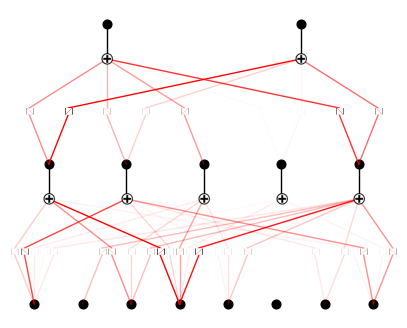

In [ ]:
model.prune(edge_th=1e-2)
model.plot()

saving model version 0.16


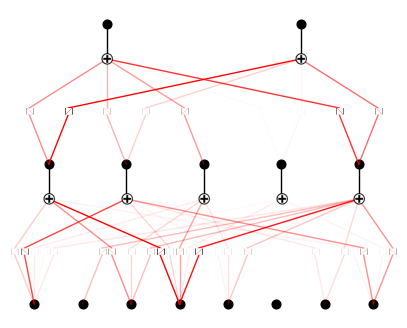

In [ ]:
model = model.prune(edge_th=0.1) 
model.plot()

In [ ]:
# 1. Force it to check for Physics terms
# We check x^2 because h^0.5 (Torricelli) might look like a polynomial segment to a KAN
lib = ['x', 'x^2', 'sqrt', 'sin', 'exp']

model.auto_symbolic(lib=lib)

# 2. Print the formula for Pump 1 (Output 0)
formula_u1 = model.symbolic_formula()[0][0]
print("--- PUMP 1 FORMULA ---")
print(formula_u1)

# 3. Print the formula for Pump 2 (Output 1)
formula_u2 = model.symbolic_formula()[0][1]
print("\n--- PUMP 2 FORMULA ---")
print(formula_u2)

skipping (0,0,0) since already symbolic
skipping (0,0,1) since already symbolic
skipping (0,0,2) since already symbolic
skipping (0,0,3) since already symbolic
skipping (0,0,4) since already symbolic
skipping (0,1,0) since already symbolic
skipping (0,1,1) since already symbolic
skipping (0,1,2) since already symbolic
skipping (0,1,3) since already symbolic
skipping (0,1,4) since already symbolic
skipping (0,2,0) since already symbolic
skipping (0,2,1) since already symbolic
skipping (0,2,2) since already symbolic
skipping (0,2,3) since already symbolic
skipping (0,2,4) since already symbolic
skipping (0,3,0) since already symbolic
skipping (0,3,1) since already symbolic
skipping (0,3,2) since already symbolic
skipping (0,3,3) since already symbolic
skipping (0,3,4) since already symbolic
skipping (0,4,0) since already symbolic
skipping (0,4,1) since already symbolic
skipping (0,4,2) since already symbolic
skipping (0,4,3) since already symbolic
skipping (0,4,4) since already symbolic


In [ ]:
model.fit(dataset, opt="LBFGS", steps=20, lamb=0.001, lamb_entropy=1.3)

| train_loss: 4.87e-02 | test_loss: 5.79e-02 | reg: 0.00e+00 | : 100%|█| 20/20 [00:02<00:00,  7.94it

saving model version 0.18


{'train_loss': [array(0.04866182, dtype=float32),
  array(0.04866183, dtype=float32),
  array(0.04866183, dtype=float32),
  array(0.04866183, dtype=float32),
  array(0.04866182, dtype=float32),
  array(0.04866183, dtype=float32),
  array(0.04866183, dtype=float32),
  array(0.04866182, dtype=float32),
  array(0.04866183, dtype=float32),
  array(0.04866182, dtype=float32),
  array(0.04866182, dtype=float32),
  array(0.04866183, dtype=float32),
  array(0.04866183, dtype=float32),
  array(0.04866182, dtype=float32),
  array(0.04866182, dtype=float32),
  array(0.04866182, dtype=float32),
  array(0.04866183, dtype=float32),
  array(0.04866182, dtype=float32),
  array(0.04866183, dtype=float32),
  array(0.04866183, dtype=float32)],
 'test_loss': [array(0.05793254, dtype=float32),
  array(0.05793254, dtype=float32),
  array(0.05793254, dtype=float32),
  array(0.05793254, dtype=float32),
  array(0.05793254, dtype=float32),
  array(0.05793254, dtype=float32),
  array(0.05793254, dtype=float32),
